In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 
downloads_path = os.path.expanduser('~/Downloads/wine.csv')

# Reading the CSV file into a DataFrame
wine_data = pd.read_csv(downloads_path)

# Data Set Overview

In [3]:
# Viewing the information about the dataset 
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Checking for missing values in the dataset
missing_values = wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Basic statistical details of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualising the Data Set

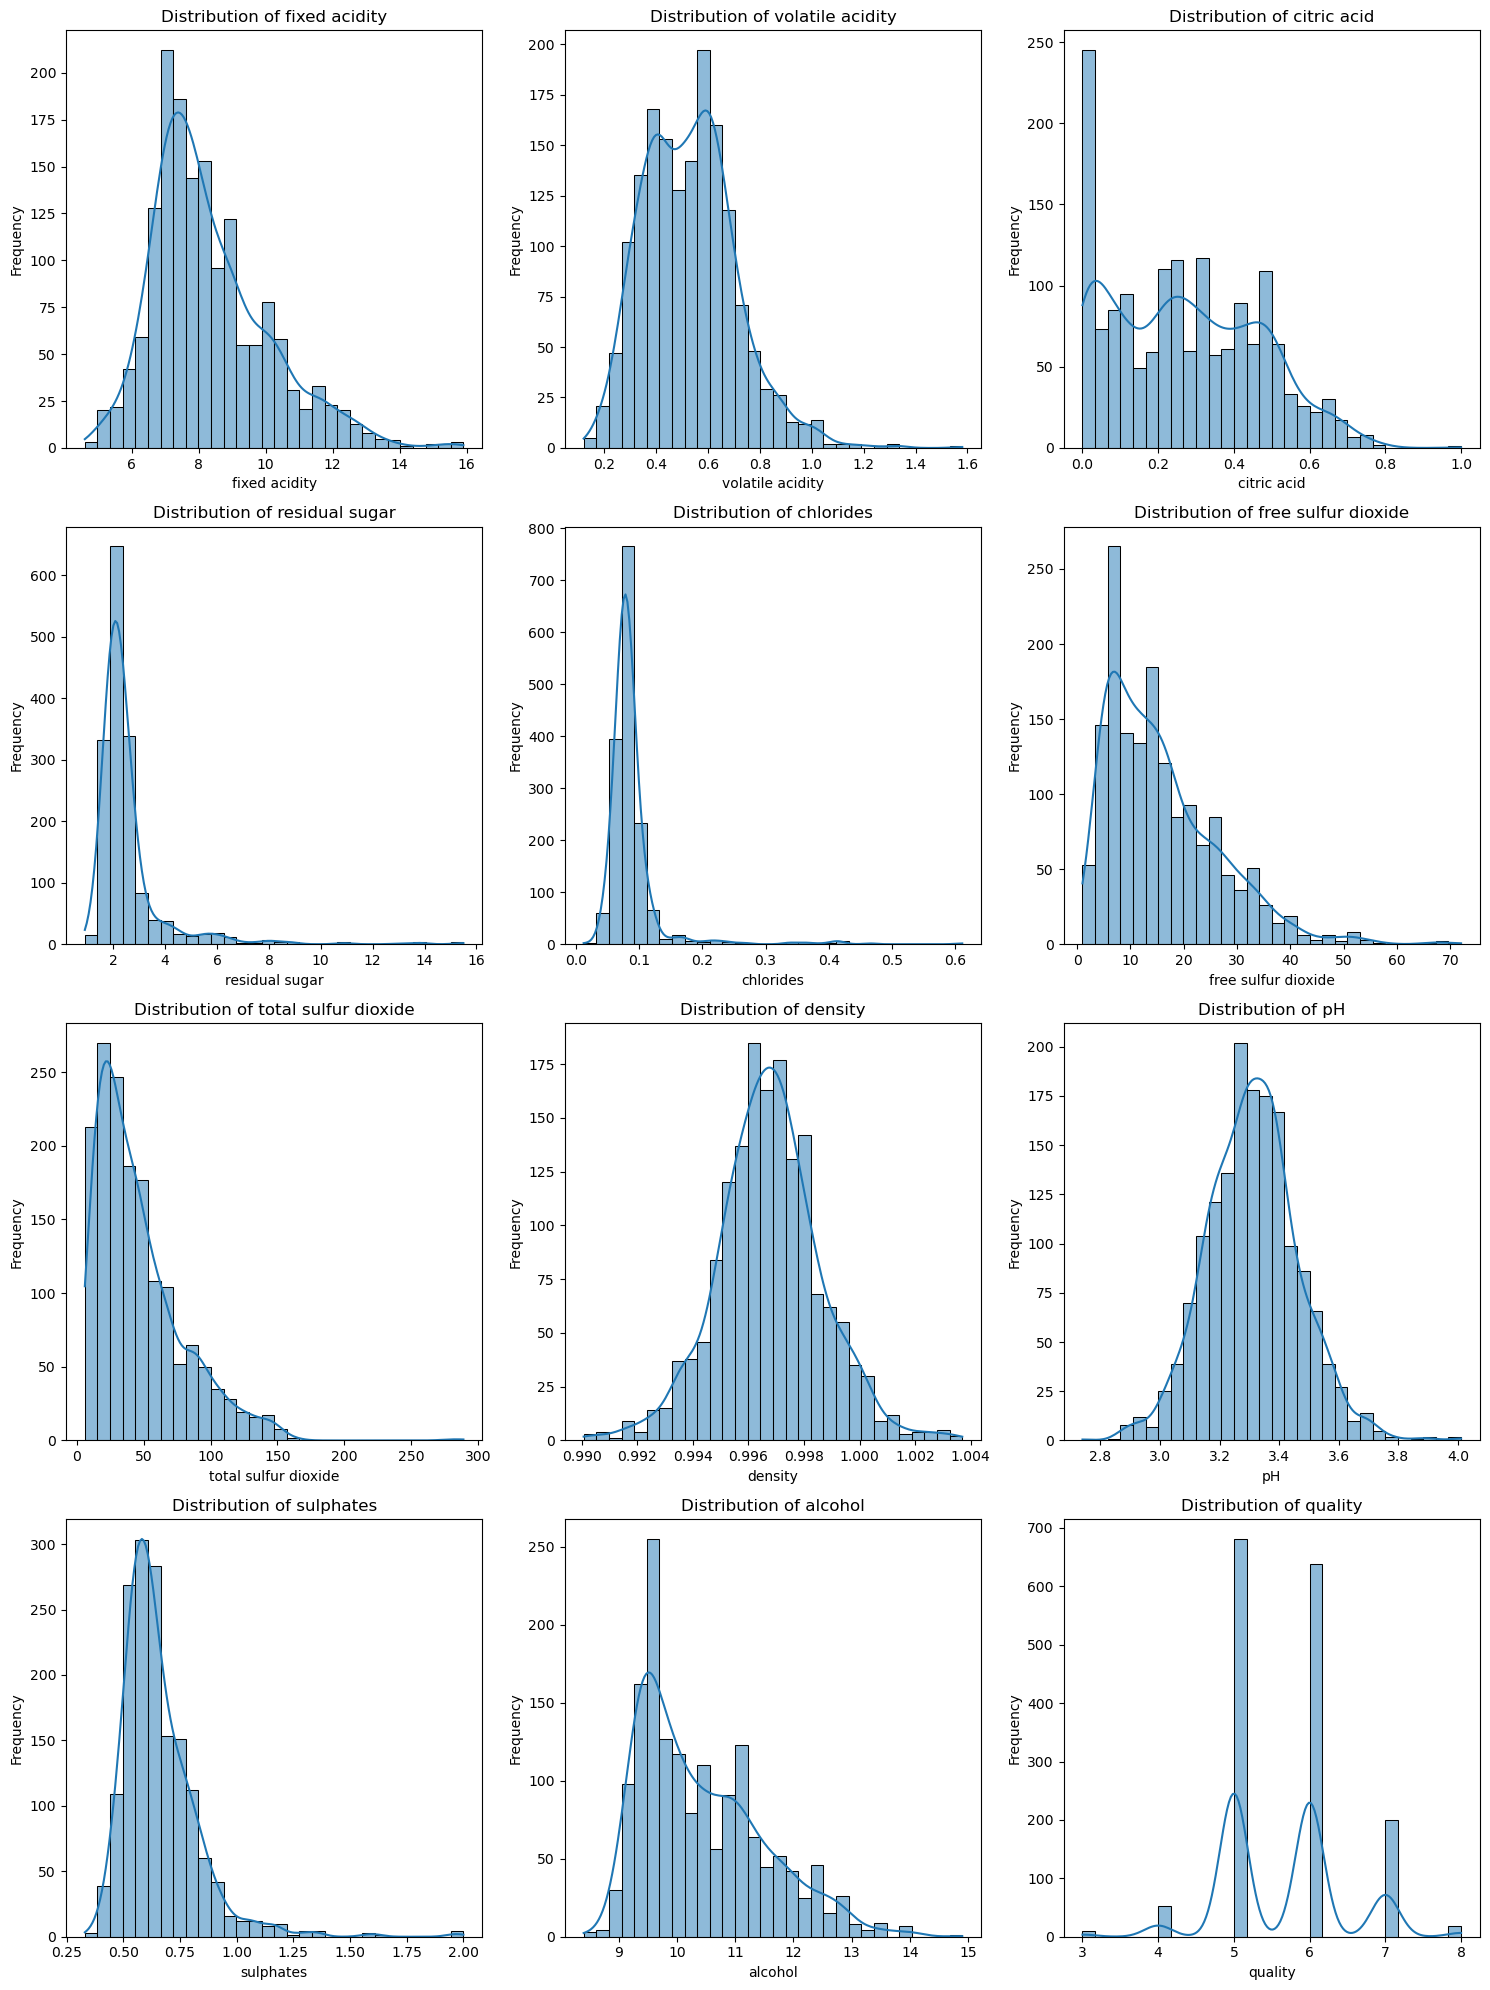

In [6]:
# Plotting the distributions of the features and the target variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(wine_data.columns):
    sns.histplot(wine_data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Removed any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


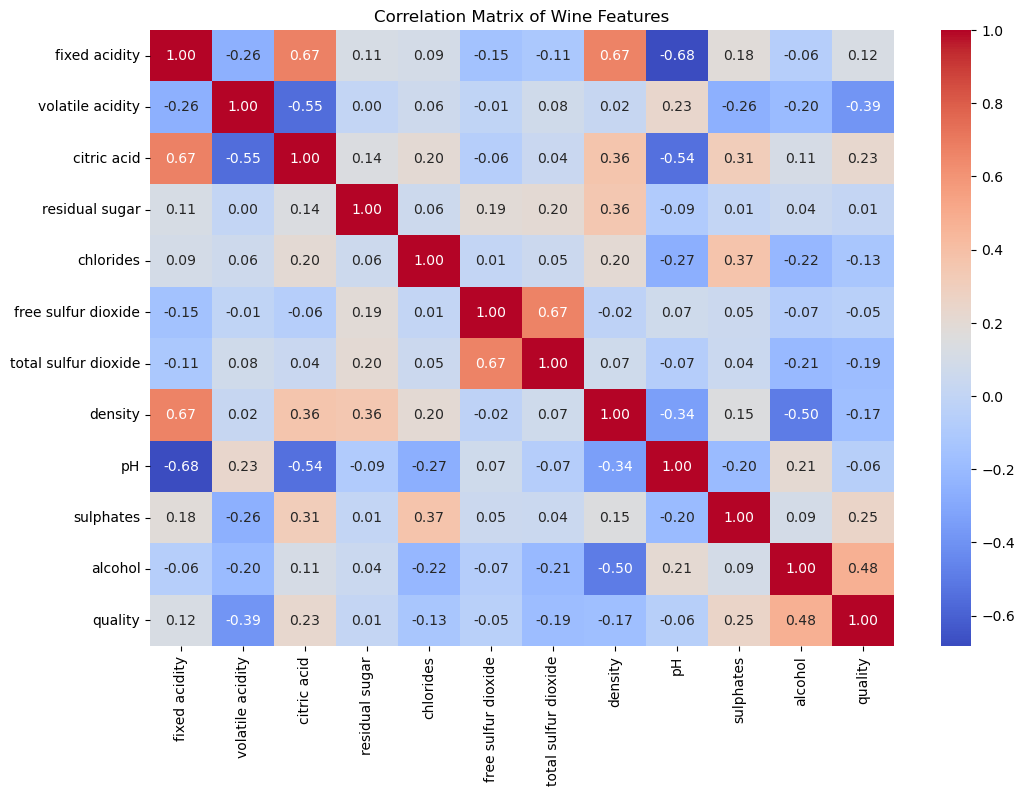

In [7]:
# Calculating and plotting the correlation matrix
correlation_matrix = wine_data.corr()

# Then plotted the heatmap of the correlation matrix for the datset
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()


# Models: 

### 1. Linear Regression

#### Model Description
We applied a Linear Regression model using gradient descent to predict the quality of red wine based on selected features. The model is trained to fit the following equation:

$$
 \hat{y} = \beta_0 + \beta_1 \times \text{Fixed Acidity} + \beta_2 \times \text{Volatile Acidity} + \beta_3 \times \text{Citric Acid} + \beta_4 \times \text{Residual Sugar} + \beta_5 \times \text{Chlorides} + \beta_6 \times \text{Free Sulfur Dioxide} + \beta_7 \times \text{Total Sulfur Dioxide} + \beta_8 \times \text{Density} + \beta_9 \times \text{pH} + \beta_{10} \times \text{Sulphates} + \beta_{11} \times \text{Alcohol} + \epsilon 
$$



Linear Regression Weights: [ 5.64298137  0.05064444 -0.16902473 -0.01719251  0.02506176 -0.08812967
  0.04657579 -0.11418616 -0.06986706 -0.07831451  0.17163564  0.26509377]
Train Set Mean Squared Error: 0.4354557894848954
Test Set Mean Squared Error: 0.3490097315668561
Baseline Mean Squared Error: 0.6060971619491138
Train Set R-squared: 0.3433876311666505
Test Set R-squared: 0.4241654338675228


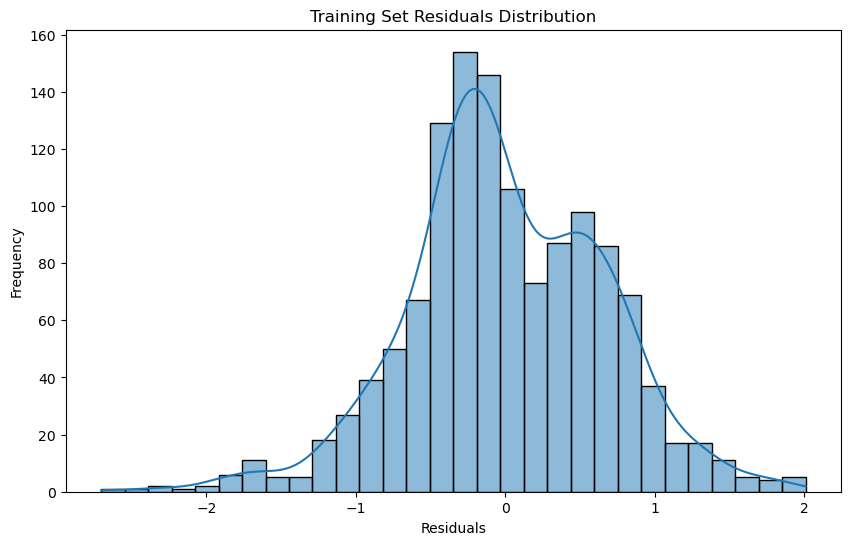

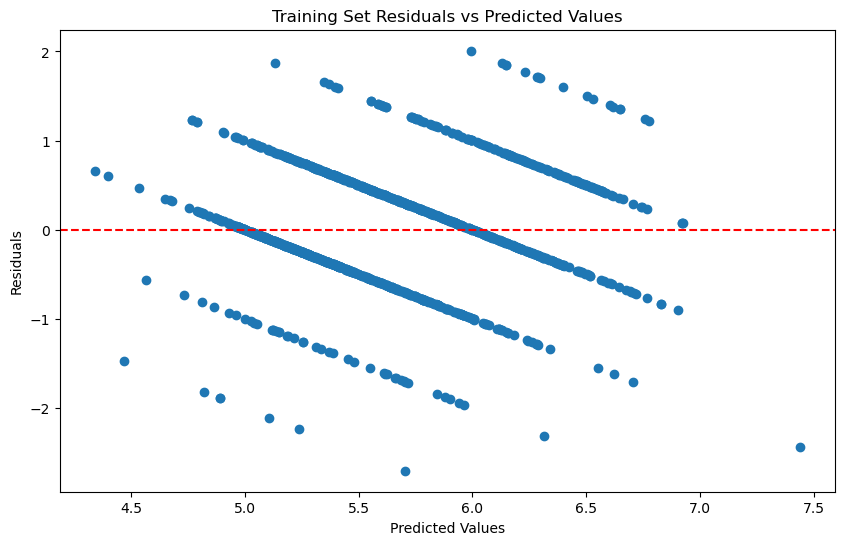

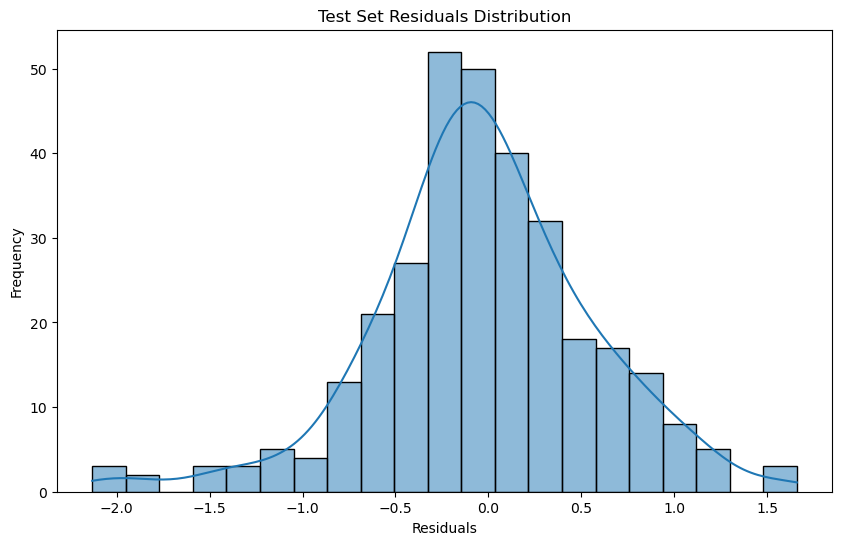

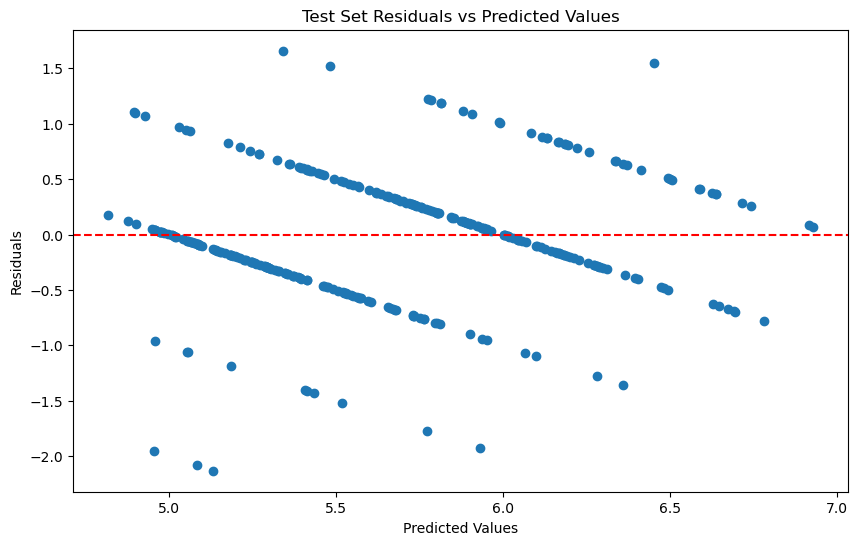

In [13]:
# We prepare the data for regression 

#  First we define a function to standardize the dataset
def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data, mean, std

# This is the function to add the intercept to the dataset
def add_intercept(data):
    intercept = np.ones((data.shape[0], 1))
    return np.hstack((intercept, data))

# Separated features (X) and target variable (y = quality)
X = wine_data.drop(columns=['quality']).values
y = wine_data['quality'].values

# Standardizing the features
X_standardized, X_mean, X_std = standardize(X)
X_standardized = add_intercept(X_standardized)

# Splitting the data into training and test sets (80% training, 20% testing)
np.random.seed(42)
indices = np.random.permutation(len(X_standardized))
train_size = int(len(X_standardized) * 0.8)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X_standardized[train_indices], X_standardized[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Implementing the linear regression using gradient descent

# Initializing the weights
weights = np.zeros(X_train.shape[1])

# We set the learning rate and the number of iterations
learning_rate = 0.01
iterations = 1000

# Performing the gradient descent
for i in range(iterations):
    predictions = X_train @ weights  # Through this we compute predictions
    errors = predictions - y_train   # To calculate any error
    gradient = X_train.T @ errors / len(X_train)  # Computing the gradient
    weights -= learning_rate * gradient  # Updating the weights

# Predicting on the training set
train_predictions = X_train @ weights

# Calculating the Mean Squared Error (MSE) on the training set
train_mse = np.mean((train_predictions - y_train) ** 2)

# Predicting on the test set
test_predictions = X_test @ weights

# Calculating the Mean Squared Error (MSE) on the test set
test_mse = np.mean((test_predictions - y_test) ** 2)

# Calculating MSE for a baseline model (mean predictor) for comparison
mean_predictor = np.mean(y_train)
baseline_mse = np.mean((mean_predictor - y_test) ** 2)

print("Linear Regression Weights:", weights)
print("Train Set Mean Squared Error:", train_mse)
print("Test Set Mean Squared Error:", test_mse)
print("Baseline Mean Squared Error:", baseline_mse)


# This is the function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Calculating R-squared for the training set
train_r_squared = calculate_r_squared(y_train, train_predictions)
print("Train Set R-squared:", train_r_squared)

# Calculating R-squared for the test set
test_r_squared = calculate_r_squared(y_test, test_predictions)
print("Test Set R-squared:", test_r_squared)


# Residual analysis for the training set
train_residuals = y_train - train_predictions
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True)
plt.title('Training Set Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(train_predictions, train_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Training Set Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residual analysis for the test set
residuals = y_test - test_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Test Set Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test Set Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



## Results of the Linear Regression

### Model Coefficients

| Feature            | Weight       |
|--------------------|--------------|
| Intercept          | 5.64298137   |
| Fixed Acidity      | 0.05064444   |
| Volatile Acidity   | -0.16902473  |
| Citric Acid        | -0.01719251  |
| Residual Sugar     | 0.02506176   |
| Chlorides          | -0.08812967  |
| Free Sulfur Dioxide| 0.04657579   |
| Total Sulfur Dioxide| -0.11418616 |
| Density            | -0.06986706  |
| pH                 | -0.07831451  |
| Sulphates          | 0.17163564   |
| Alcohol            | 0.26509377   |

### Performance Metrics

| Metric                      | Value             |
|-----------------------------|-------------------|
| Test (MSE)                  | 0.3490097315668561|
| Training (MSE)              | 0.4354557894848954|
| Baseline Mean Squared Error (MSE)| 0.6060971619491138 |
| Test R-squared               | 0.4241654338675228 |
| Training R-squared           |  0.3433876311666505 |



### 2. Logistic Regression

#### Model Description
We applied a Logistic Regression model using gradient descent to classify the quality of red wine as either good (quality score $\geq 6$) or poor (quality score $< 6$). The model is trained to fit the following equation:

$$
 \hat{p} = \sigma(\beta_0 + \beta_1 \times \text{Fixed Acidity} + \beta_2 \times \text{Volatile Acidity} + \beta_3 \times \text{Citric Acid} + \beta_4 \times \text{Residual Sugar} + \beta_5 \times \text{Chlorides} + \beta_6 \times \text{Free Sulfur Dioxide} + \beta_7 \times \text{Total Sulfur Dioxide} + \beta_8 \times \text{Density} + \beta_9 \times \text{pH} + \beta_{10} \times \text{Sulphates} + \beta_{11} \times \text{Alcohol}) 
$$

where:

- $\hat{p}$ is the predicted probability of the wine being of good quality.
- $\sigma$ is the sigmoid function.
- $\beta_0$ is the intercept.
- $\beta_1, \beta_2, \ldots, \beta_{11}$ are the coefficients for each feature.



Logistic Regression Weights: [ 0.15191729  0.13435275 -0.40456199  0.03562175  0.0749772  -0.16593101
  0.0583083  -0.36272216 -0.20243718 -0.02057199  0.36738024  0.61536261]
Training Set Accuracy: 0.7208756841282252
Test Set Accuracy: 0.803125
Training Set Precision: 0.7492163009404389
Training Set Recall: 0.7081481481481482
Training Set F1 Score: 0.7281035795887281
Test Set Precision: 0.8342857142857143
Test Set Recall: 0.8111111111111111
Test Set F1 Score: 0.8225352112676056
Test Set Confusion Matrix:
[[111  29]
 [ 34 146]]


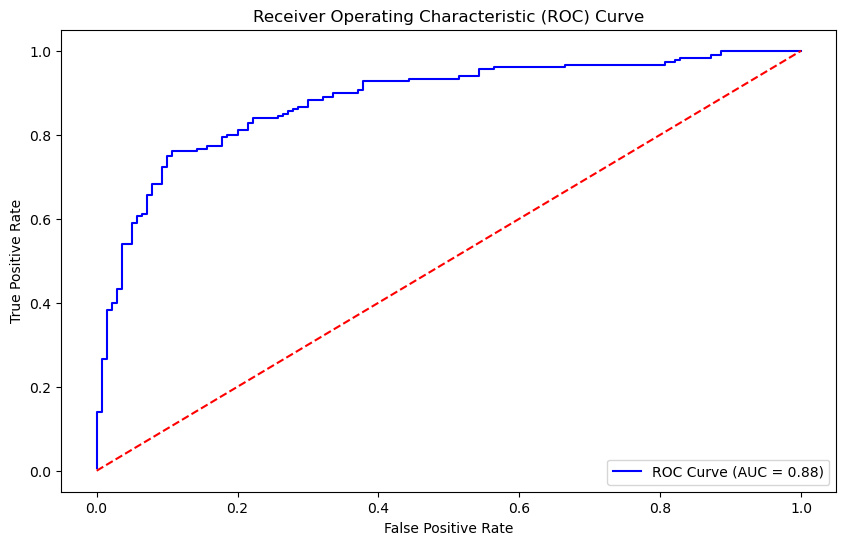

Test Set AUC: 0.88


In [12]:
# We prepare the data for classification

# We are converting the quality scores into binary classification (good quality: 6 or above, poor quality: below 6)
y_class = (wine_data['quality'] >= 6).astype(int).values

# Then we split the classification target variable into training and test sets
y_train_class, y_test_class = y_class[train_indices], y_class[test_indices]

# We initialize the weights for logistic regression
weights_class = np.zeros(X_train.shape[1])

# The sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# We then set the learning rate and the number of iterations for gradient descent
learning_rate_class = 0.01-
iterations_class = 1000

# We performed the gradient descent for logistic regression
for i in range(iterations_class):
    predictions_class = sigmoid(X_train @ weights_class)  # Computes the predictions
    errors_class = predictions_class - y_train_class      # Calculates errors
    gradient_class = X_train.T @ errors_class / len(X_train)  # Computes the gradient
    weights_class -= learning_rate_class * gradient_class  # Updates the weights

# Then we predict on the training set
train_predictions_class = sigmoid(X_train @ weights_class)
train_predictions_class_binary = (train_predictions_class >= 0.5).astype(int)

# To predict on the test set
test_predictions_class = sigmoid(X_test @ weights_class)
test_predictions_class_binary = (test_predictions_class >= 0.5).astype(int)

# Calculating the accuracy on the training set
train_accuracy = np.mean(train_predictions_class_binary == y_train_class)
# Calculating the accuracy on the test set
test_accuracy = np.mean(test_predictions_class_binary == y_test_class)

# Print the weights and accuracy
print("Logistic Regression Weights:", weights_class)
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Performance metrics on the training set
train_tp = np.sum((y_train_class == 1) & (train_predictions_class_binary == 1))
train_tn = np.sum((y_train_class == 0) & (train_predictions_class_binary == 0))
train_fp = np.sum((y_train_class == 0) & (train_predictions_class_binary == 1))
train_fn = np.sum((y_train_class == 1) & (train_predictions_class_binary == 0))

train_precision = train_tp / (train_tp + train_fp) if (train_tp + train_fp) > 0 else 0
train_recall = train_tp / (train_tp + train_fn) if (train_tp + train_fn) > 0 else 0
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall) if (train_precision + train_recall) > 0 else 0

print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1)

# Performance metrics on the test set
test_tp = np.sum((y_test_class == 1) & (test_predictions_class_binary == 1))
test_tn = np.sum((y_test_class == 0) & (test_predictions_class_binary == 0))
test_fp = np.sum((y_test_class == 0) & (test_predictions_class_binary == 1))
test_fn = np.sum((y_test_class == 1) & (test_predictions_class_binary == 0))

test_precision = test_tp / (test_tp + test_fp) if (test_tp + test_fp) > 0 else 0
test_recall = test_tp / (test_tp + test_fn) if (test_tp + test_fn) > 0 else 0
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall) if (test_precision + test_recall) > 0 else 0

print("Test Set Precision:", test_precision)
print("Test Set Recall:", test_recall)
print("Test Set F1 Score:", test_f1)

# Confusion matrix for the test set
confusion_matrix_test = np.array([[test_tn, test_fp],
                                  [test_fn, test_tp]])

print("Test Set Confusion Matrix:")
print(confusion_matrix_test)

# ROC Curve and AUC for the test set for better understanding of the model
def calculate_roc_auc(y_true, y_scores):
    thresholds = np.sort(np.unique(y_scores))[::-1]
    tpr_values = []
    fpr_values = []
    
    P = sum(y_true)
    N = len(y_true) - P
    
    for threshold in thresholds:
        y_pred = y_scores >= threshold
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tpr = tp / P
        fpr = fp / N
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    
    # Sorting the values for plotting
    tpr_values = np.array(tpr_values)
    fpr_values = np.array(fpr_values)
    
    # Calculating the AUC using the trapezoidal rule
    auc = np.trapz(tpr_values, fpr_values)
    
    return fpr_values, tpr_values, auc

# Calculating ROC and AUC
fpr, tpr, roc_auc = calculate_roc_auc(y_test_class, test_predictions_class)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Test Set AUC: {roc_auc:.2f}")




## Results of the Logistic Regression



### Model Coefficients

| Feature             | Weight       |
|---------------------|--------------|
| Intercept           | 0.15191729   |
| Fixed Acidity       | 0.13435275   |
| Volatile Acidity    | -0.40456199  |
| Citric Acid         | 0.03562175   |
| Residual Sugar      | 0.0749772    |
| Chlorides           | -0.16593101  |
| Free Sulfur Dioxide | 0.0583083    |
| Total Sulfur Dioxide| -0.36272216  |
| Density             | -0.20243718  |
| pH                  | -0.02057199  |
| Sulphates           | 0.36738024   |
| Alcohol             | 0.61536261   |

### Performance Metrics

| Metric                | Value   |
|-----------------------|---------|
| Test Set Accuracy     | 80.31\% |
| Training Set Accuracy | 72.08\% |
| Training Set Precision| 74.92\% |
| Training Set Recall   | 70.81\% |
| Training Set F1 Score | 72.81\% |
| Test Set Precision    | 83.42\% |
| Test Set Recall       | 81.11\% |
| Test Set F1 Score     | 82.25\% |

